# Emotion Recognition in Speech

## Contents

* [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
* [Imports](#Imports)

### Introduction

This step focuses on collecting data, organizing it, and making sure it's well defined. 
Attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, 
but it's important not to be overzealous in your cleaning before we've explored the data to better understand it.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a predictive model for emotion recognition in speech. 
We suspects it may have better responses to human / robot interaction based on categories of emotion detect 
from customers with audio-enabled bots. The categorization of the customer's emotial state can better atune a variety 
of optional responses to customize interations. This project aims to build a predictive model for emotion recognition 
based on a set of actor data that falls into 8 categories of emotional state. This model will be used to provide 
guidance for an audio-enabled bot's available responses and future customer interaction.

### Imports

In [48]:
# Importing librosa, soundfile, os, glob, pickle, numpy in the lines below
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from dotenv import load_dotenv, find_dotenv

load_dotenv()
sound_path = os.getenv('audio_path')

### Objectives

There are some fundamental questions to resolve in this notebook.

•Do we may have the data we need to tackle the desired question?  
      •Have we identified the required target value?   
      •Do we have potentially useful features?   
•Do we have any fundamental issues with the data?  

### Loading and Visualizing an Audio File

In [49]:
import librosa
# path of the audio file
audio_data = f'{sound_path}/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav'
# This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ
x, sr = librosa.load(audio_data, sr=None)

# We can change this behavior by resampling at sr=44.1KHz.
# x = librosa.load(audio_data, sr=44000)

### Audio File information

In [50]:
print(x.shape)
print(sr)

(52853,)
16000


### Playing a sample

In [51]:
import IPython.display as ipd
ipd.Audio('C:/Users/where/Documents/Data Science/Projects/18.1 Capstone Two/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav') # load a local WAV file

### Visualizing the Audio File

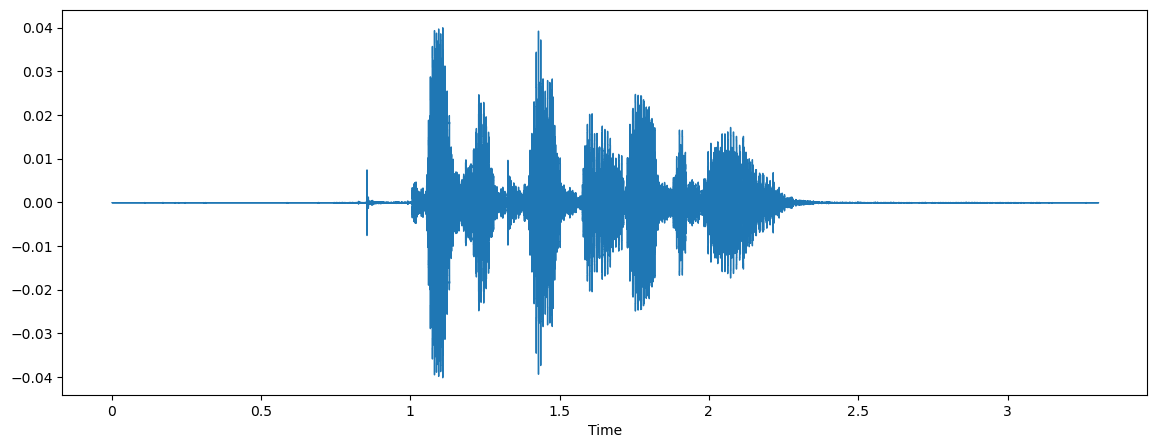

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
# plotting the sampled signal
librosa.display.waveshow(x, sr=sr)

### Spectrogram Vizualizing

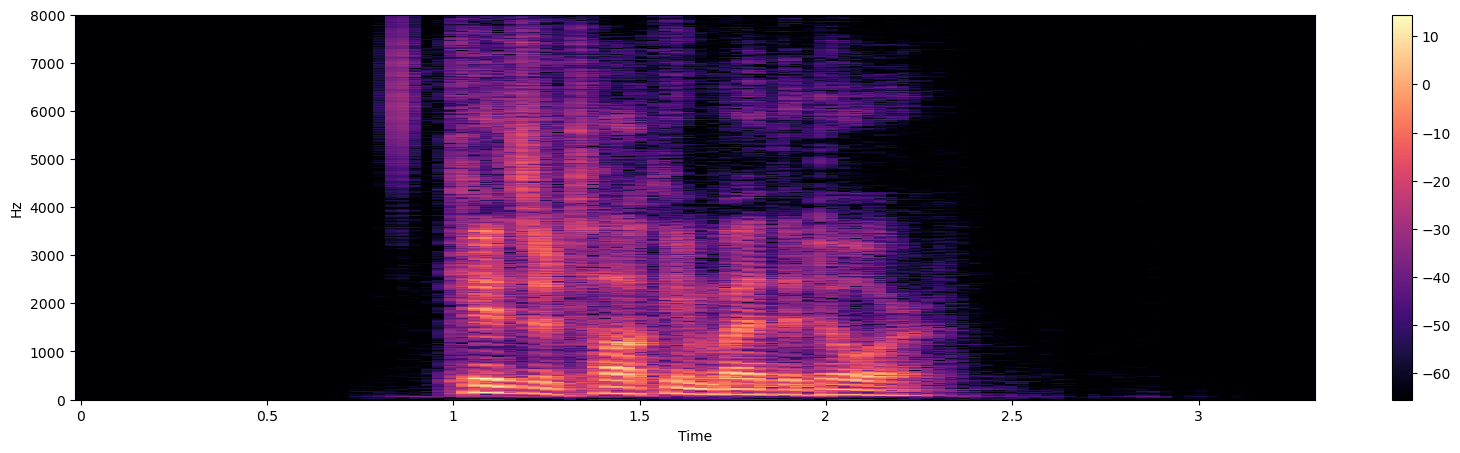

In [56]:
# x: numpy array
X = librosa.stft(x)
# converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Display in log-frequency

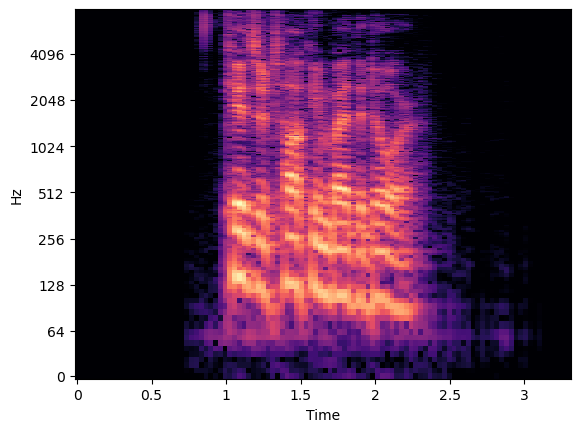

In [58]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

### Creating an audio signal and saving it

In [75]:
soundfile.write('stereo_file1.wav', x, sr)

### Normalization

NameError: name 'spectral_centroids' is not defined

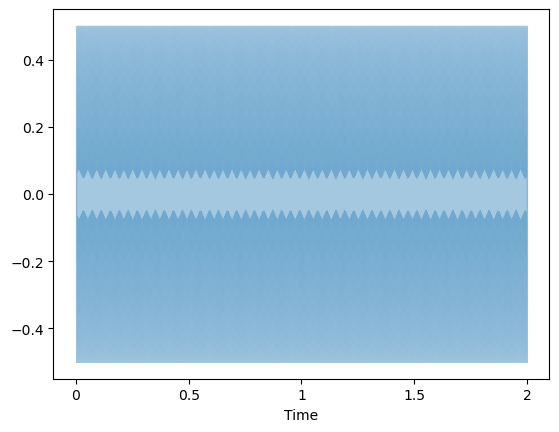

In [63]:
#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [72]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']